# Introduction to Convolutional Neural Network and Computer Vision with Tensorflow

Computer Vision is the practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self driving car recognizing the objects in front of the car.

## Get the data

The images we are working with are from Food 101 dataset (101 different class of foods): https://www.kaggle.com/dansbecker/food-101 . However we've modified it to only use two classes (pizza & steak) using image data modification notebook: https://www.github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

Note: we start with smaller dataset so we can experiment quickly and figure out what works (or better yet what does not work) before scaling up.

In [ ]:
import zipfile

# wget, download the data from the link
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()  # extractall() will extract the zip file
zip_ref.close()

--2023-02-06 12:52:08--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.79.128, 108.177.127.128, 172.217.218.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.79.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  30.5MB/s    in 3.6s    

2023-02-06 12:52:12 (28.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for computer vision project... this usually means visualizing many smaples of your data.

In [ ]:
# If Running in Colab or Linux use
!ls pizza_steak

# If running in Windows
# !dir pizza_steak

test  train


In [ ]:
# If Running in Colab or Linux use
!ls pizza_steak/train

# If running in windows
# !dir pizza_steak\train

pizza  steak


In [ ]:
# If running in colab or linux
!ls pizza_steak/train/steak

# If running in windows
# !dir pizza_steak\train\steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list the number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# If there is an extra images in your directory you can check it by using the following commands
# In Colab or Linux OS
# !ls -la pizza_steak

In [ ]:
# Another way to find out how many images are in the file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_test = len(os.listdir("pizza_steak/test/steak"))
num_pizza_images_train = len(os.listdir("pizza_steak/train/pizza"))
num_pizza_images_test = len(os.listdir("pizza_steak/test/pizza"))
num_steak_images_train, num_steak_images_test, num_pizza_images_train, num_pizza_images_test

(750, 250, 750, 250)

To visualize our images, first let's get the class names programmatically

In [ ]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Created a list of class names from the subdirectory

# if you are getting .DS_Store file you can remove it by using the below code
# class_names = class_names[1:]
print(class_names)

['pizza' 'steak']


In [ ]:
# Let's Visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    """Used to view a random image.

    target_dir: Is the name of the target directory
    target_class: Is the name of the image class which you want to view

    """

    # Setup the target directory (we'll images from here)
    target_folder = target_dir + target_class

    # Get a random images path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(f"File Name: {random_image}")

    # Read in the image and plot in using matplotlib
    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    print(f"Image Shape: {img.shape}") # Show the shape of image

    return img

File Name: ['3334973.jpg']
Image Shape: (512, 512, 3)


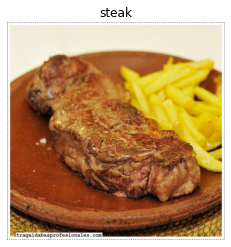

In [ ]:
# Let's view a random images from the directory
img = view_random_image(target_dir="pizza_steak/train/",
                          target_class="steak")

In [ ]:
import tensorflow as tf

# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
# Let's convert the pixel value of the img into tensor
tf.constant(img)
# Here the number of columns in the tensor is showing the number of colors (i.e. RGB (3))
# And the value represent the value of that color e.g. [  3,   3,  13] here Value of Red = 3, Green = 3, Blue = 13

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 87,  87,  87],
        [ 99,  99,  99],
        [239, 239, 239],
        ...,
        [255, 255, 255],
        [215, 215, 215],
        [127, 127, 127]],

       [[ 54,  54,  54],
        [175, 175, 175],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [206, 206, 206],
        [101, 101, 101]],

       [[ 83,  83,  83],
        [212, 212, 212],
        [248, 248, 248],
        ...,
        [249, 249, 249],
        [207, 207, 207],
        [127, 127, 127]],

       ...,

       [[189, 189, 191],
        [249, 249, 251],
        [255, 255, 255],
        ...,
        [246, 246, 246],
        [245, 245, 245],
        [210, 210, 210]],

       [[ 51,  51,  53],
        [170, 170, 172],
        [252, 252, 254],
        ...,
        [255, 255, 255],
        [199, 199, 199],
        [ 95,  95,  95]],

       [[ 90,  90,  92],
        [ 96,  96,  98],
        [241, 241, 243],
        ...,
        [255, 255, 25

In [ ]:
# View the images shape
img.shape
# this represent the (width, height, color channel)
# For Black and White Image, Color Channel value = 2
# For Color Image, Color Channel value = 3

(512, 512, 3)

In [ ]:
# Let's Normalize the pixel value of the image i.e. Scale it to 0 & 1
img/255.0

array([[[0.34117647, 0.34117647, 0.34117647],
        [0.38823529, 0.38823529, 0.38823529],
        [0.9372549 , 0.9372549 , 0.9372549 ],
        ...,
        [1.        , 1.        , 1.        ],
        [0.84313725, 0.84313725, 0.84313725],
        [0.49803922, 0.49803922, 0.49803922]],

       [[0.21176471, 0.21176471, 0.21176471],
        [0.68627451, 0.68627451, 0.68627451],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [0.80784314, 0.80784314, 0.80784314],
        [0.39607843, 0.39607843, 0.39607843]],

       [[0.3254902 , 0.3254902 , 0.3254902 ],
        [0.83137255, 0.83137255, 0.83137255],
        [0.97254902, 0.97254902, 0.97254902],
        ...,
        [0.97647059, 0.97647059, 0.97647059],
        [0.81176471, 0.81176471, 0.81176471],
        [0.49803922, 0.49803922, 0.49803922]],

       ...,

       [[0.74117647, 0.74117647, 0.74901961],
        [0.97647059, 0.97647059, 0.98431373],
        [1.        , 1

## An end-to-end example

Let's build a connvolutional neural network to find pattern in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN model to find pattern in our images
* Compile our CNN
* Fit the CNN to the training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.keras.utils.set_random_seed(43)

# Preprocess data (get all the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1/255.0)
valid_datagen = ImageDataGenerator(rescale=1/255.0)

# Set up path to directories
train_dir = "pizza_steak/train"
valid_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              classes=["pizza", "steak"],
                                              seed=43)

valid_data = valid_datagen.flow_from_directory(directory=valid_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode="binary",
                                              classes=["pizza", "steak"],
                                              seed=43)

# Build a CNN model (same as the tiny VGG model on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
#     """ First Layer Convolutional Layer """
    # Step-1. Convolution layer
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation='relu',
                          input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation='relu'),
    # Step-2. Max pooled layers
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"),

#     """ Second Convolutional Layer """
    # Step-1. Convolutional layer
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation='relu'),
    # Step-2. Max Pooled Layer
    tf.keras.layers.MaxPool2D(pool_size=2),

    # Step-3. Flatten layer
    tf.keras.layers.Flatten(),

    # Step-4. Full Connection
    tf.keras.layers.Dense(units=1,
                         activation='sigmoid')
])

# Compile the CNN model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

# Fit the CNN model
history_1 = model_1.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/20
47/47 [==============================] - 19s 220ms/step - loss: 0.6309 - accuracy: 0.6420 - val_loss: 0.5483 - val_accuracy: 0.7040
Epoch 2/20
47/47 [==============================] - 9s 192ms/step - loss: 0.5146 - accuracy: 0.7647 - val_loss: 0.4364 - val_accuracy: 0.8000
Epoch 3/20
47/47 [==============================] - 9s 188ms/step - loss: 0.4667 - accuracy: 0.7840 - val_loss: 0.3872 - val_accuracy: 0.8320
Epoch 4/20
47/47 [==============================] - 10s 207ms/step - loss: 0.4122 - accuracy: 0.8133 - val_loss: 0.3986 - val_accuracy: 0.8360
Epoch 5/20
47/47 [==============================] - 11s 236ms/step - loss: 0.3880 - accuracy: 0.8240 - val_loss: 0.3272 - val_accuracy: 0.8580
Epoch 6/20
47/47 [==============================] - 10s 208ms/step - loss: 0.3508 - accuracy: 0.8560 - val_loss: 0.3623 - val_accuracy: 0.8520
Epoch 7/20
47/47 [==============================] - 9s 200ms/

In [ ]:
# Number of batches
len(train_data)

47

In [ ]:
train_data_images = 1500
batch_size = 32
number_of_batches = round(train_data_images / batch_size)
number_of_batches

47

In [ ]:
history_1.history

{'loss': [0.630932092666626,
  0.5145775675773621,
  0.4666772782802582,
  0.41224393248558044,
  0.3879901170730591,
  0.35083910822868347,
  0.3125878870487213,
  0.28613919019699097,
  0.23772217333316803,
  0.17878183722496033,
  0.1452026218175888,
  0.11985599994659424,
  0.11321711540222168,
  0.04951415956020355,
  0.06931432336568832,
  0.02451051026582718,
  0.013529252260923386,
  0.005592826753854752,
  0.002992206020280719,
  0.0023500584065914154],
 'accuracy': [0.6420000195503235,
  0.7646666765213013,
  0.7839999794960022,
  0.8133333325386047,
  0.8240000009536743,
  0.8560000061988831,
  0.8786666393280029,
  0.8806666731834412,
  0.9073333144187927,
  0.9319999814033508,
  0.9506666660308838,
  0.9613333344459534,
  0.9613333344459534,
  0.9866666793823242,
  0.9739999771118164,
  0.9953333139419556,
  0.9993333220481873,
  0.9993333220481873,
  1.0,
  1.0],
 'val_loss': [0.5482707023620605,
  0.4363822340965271,
  0.387239009141922,
  0.39863350987434387,
  0.327199

In [ ]:
import pandas as pd
pd.DataFrame(history_1.history)

,loss,accuracy,val_loss,val_accuracy
0,0.630932,0.642000,0.548271,0.704
1,0.514578,0.764667,0.436382,0.800
2,0.466677,0.784000,0.387239,0.832
3,0.412244,0.813333,0.398634,0.836
4,0.387990,0.824000,0.327200,0.858
5,0.350839,0.856000,0.362289,0.852
6,0.312588,0.878667,0.396014,0.834
7,0.286139,0.880667,0.365737,0.852
8,0.237722,0.907333,0.351313,0.840
9,0.178782,0.932000,0.401367,0.832


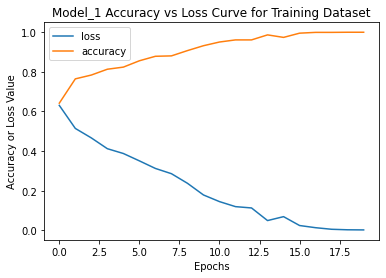

In [ ]:
pd.DataFrame(history_1.history).iloc[:, :2].plot(title="Model_1 Accuracy vs Loss Curve for Training Dataset",
                                                 xlabel="Epochs",
                                                 ylabel="Accuracy or Loss Value")

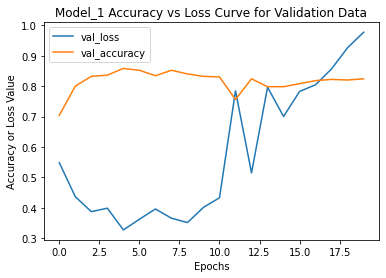

In [ ]:
pd.DataFrame(history_1.history).iloc[:, 2:].plot(title="Model_1 Accuracy vs Loss Curve for Validation Data",
                                     xlabel='Epochs',
                                     ylabel='Accuracy or Loss Value')

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

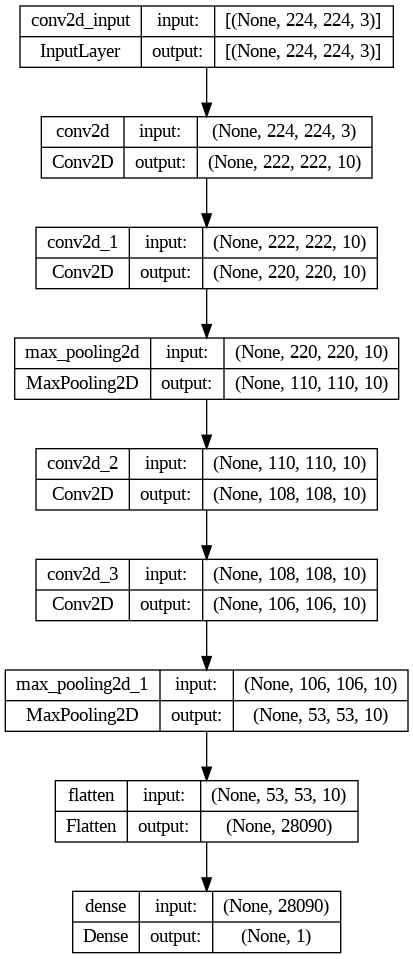

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model_1, show_shapes=True)

### Let's Find the optimal Learning Rate

In [ ]:
# Set the random seed
tf.keras.utils.set_random_seed(43)

# Create the model
model_2 = tf.keras.models.Sequential([
    # First Convolutional Layer
    # Step-1 Convolution Layer
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224, 224, 3),
                           activation='relu',
                           padding='same'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),

    # Step-2 Pooling Layer
    tf.keras.layers.MaxPool2D(pool_size=2,
                              strides=1,
                              padding='same'),

    # Second Convolutional Layer
    # Step-1 Convolution Layer
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           padding='same'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu',
                           padding='same'),

    # Step-2 Pooling Layer
    tf.keras.layers.MaxPool2D(pool_size=2,
                              strides=1,
                              padding='same'),

    # Step-3 Flatten Layer
    tf.keras.layers.Flatten(),

    # Step-4 Full Connection Layer
    tf.keras.layers.Dense(units=1,
                          activation='sigmoid')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

# Finding the value of optimal learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=100,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[lr_scheduler])

Epoch 1/100
47/47 [==============================] - 13s 246ms/step - loss: 0.6794 - accuracy: 0.6460 - val_loss: 0.4962 - val_accuracy: 0.7780 - lr: 1.0000e-04
Epoch 2/100
47/47 [==============================] - 9s 196ms/step - loss: 0.4875 - accuracy: 0.7800 - val_loss: 0.4702 - val_accuracy: 0.7700 - lr: 1.1220e-04
Epoch 3/100
47/47 [==============================] - 10s 218ms/step - loss: 0.4347 - accuracy: 0.8167 - val_loss: 0.3720 - val_accuracy: 0.8240 - lr: 1.2589e-04
Epoch 4/100
47/47 [==============================] - 10s 215ms/step - loss: 0.3993 - accuracy: 0.8253 - val_loss: 0.4337 - val_accuracy: 0.7860 - lr: 1.4125e-04
Epoch 5/100
47/47 [==============================] - 10s 218ms/step - loss: 0.3742 - accuracy: 0.8387 - val_loss: 0.3339 - val_accuracy: 0.8540 - lr: 1.5849e-04
Epoch 6/100
47/47 [==============================] - 11s 237ms/step - loss: 0.3204 - accuracy: 0.8713 - val_loss: 0.3314 - val_accuracy: 0.8540 - lr: 1.7783e-04
Epoch 7/100
47/47 [================

In [ ]:
1e-4 * 10 ** (100/20)

10.0

In [ ]:
len(history_2.history['loss'])

100

### Plot the Learning Rate Decay Curve

Text(0, 0.5, 'Loss')

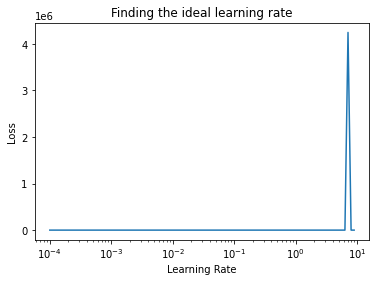

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.semilogx(lrs, history_2.history["loss"]) # Want x-axis to be log-scale

# Setting the labels and title
plt.title("Finding the ideal learning rate")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

In [ ]:
# Set the random seed
tf.keras.utils.set_random_seed(43)

# Create the model
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 252ms/step - loss: 0.7025 - accuracy: 0.5173 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 13s 284ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 14s 300ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 12s 251ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 11s 246ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 150528)            0         
                                                                 
 dense_6 (Dense)             (None, 4)                 602116    
                                                                 
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN model (model_1) model_3 performs terribly... Let's try to improve it

In [ ]:
# Set the random seed
tf.keras.utils.set_random_seed(43)

# Create the model
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=5, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model_4.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/10
47/47 [==============================] - 9s 183ms/step - loss: 0.1842 - accuracy: 0.7127 - val_loss: 0.1289 - val_accuracy: 0.7640
Epoch 2/10
47/47 [==============================] - 9s 196ms/step - loss: 0.2338 - accuracy: 0.6507 - val_loss: 0.1422 - val_accuracy: 0.7400
Epoch 3/10
47/47 [==============================] - 9s 195ms/step - loss: 0.1289 - accuracy: 0.7673 - val_loss: 0.1121 - val_accuracy: 0.7860
Epoch 4/10
47/47 [==============================] - 9s 184ms/step - loss: 0.1133 - accuracy: 0.7960 - val_loss: 0.1144 - val_accuracy: 0.7840
Epoch 5/10
47/47 [==============================] - 8s 173ms/step - loss: 0.1135 - accuracy: 0.8033 - val_loss: 0.1122 - val_accuracy: 0.8040
Epoch 6/10
47/47 [==============================] - 9s 193ms/step - loss: 0.1132 - accuracy: 0.8067 - val_loss: 0.1168 - val_accuracy: 0.7780
Epoch 7/10
47/47 [==============================] - 9s 195ms/step - loss: 0.1128 - accuracy: 0.7947 - val_loss: 0.1120 - val_accuracy: 0.7860
Epoch 

In [ ]:
pd.DataFrame(history_4.history)

,loss,accuracy,val_loss,val_accuracy
0,0.184167,0.712667,0.128898,0.764
1,0.233777,0.650667,0.142214,0.740
2,0.128889,0.767333,0.112147,0.786
3,0.113310,0.796000,0.114392,0.784
4,0.113459,0.803333,0.112214,0.804
5,0.113166,0.806667,0.116814,0.778
6,0.112835,0.794667,0.112017,0.786
7,0.127919,0.760000,0.140400,0.776
8,0.109835,0.808000,0.123191,0.770
9,0.101581,0.822667,0.113602,0.776


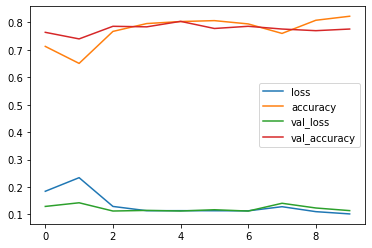

In [ ]:
pd.DataFrame(history_4.history).plot()

In [ ]:
model_4.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_11 (Flatten)        (None, 150528)            0         
                                                                 
 dense_19 (Dense)            (None, 10)                1505290   
                                                                 
 dense_20 (Dense)            (None, 10)                110       
                                                                 
 dense_21 (Dense)            (None, 5)                 55        
                                                                 
 dense_22 (Dense)            (None, 1)                 6         
                                                                 
Total params: 1,505,461
Trainable params: 1,505,461
Non-trainable params: 0
_________________________________________________________________


## Binary Classifcation, Let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared with our model, the main step here is scaling/normalizing & turning data into batches)
3. Create a model (start with baseline)
4. Fit the model
5. Evaluate the model
6. Adjust the different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfy (experiment, experiment, experiment)

### 1. Become one with the data (visualize, visualize, visualize)

File Name: ['2357281.jpg']
Image Shape: (512, 512, 3)
File Name: ['1138936.jpg']
Image Shape: (512, 512, 3)


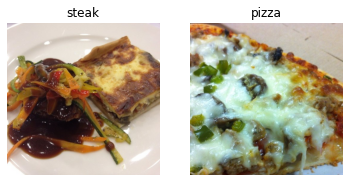

In [ ]:
# Visualize the data
plt.figure()
plt.subplot(1, 2, 1)
steak_ima = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### Preprocess the data (prepare it for the model)



In [ ]:
# Define the directory path of the dataset
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

Our next step is to turn the data into **batches**

A batch is a small subset of data. Rather than look at ~10,000 images at one time, a model might look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn patter in 10,000  in one hit could result, in not being able to run properly.

Why 32?
Beacuse it's good for your computer's health...

In [ ]:
!nvidia-smi

Mon Feb  6 12:52:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P0    27W /  70W |    312MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Create train and test image data generator and scale it
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)

In [ ]:
# Load our image data from the directory and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,  # Target directory of the images
                                               target_size=(224, 224),  # Target size of the images (height, width)
                                               class_mode='binary',  # Type of data you're working with
                                               batch_size=32)  # Size of minibatches to load data into
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get the samples of train data batch
images, labels = train_data.next() # Get the "next" batch of images/labels in the train data
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there
len(train_data), round(1500/32)

(47, 47)

In [ ]:
# Let's get the first two images from the first batch
images[:2], images[0].shape

(array([[[[0.75294125, 0.81568635, 0.8117648 ],
          [0.72156864, 0.77647066, 0.77647066],
          [0.69411767, 0.7490196 , 0.7490196 ],
          ...,
          [0.41960788, 0.4901961 , 0.5372549 ],
          [0.42352945, 0.49411768, 0.5411765 ],
          [0.4039216 , 0.47450984, 0.52156866]],
 
         [[0.76470596, 0.82745105, 0.81568635],
          [0.7176471 , 0.7725491 , 0.7725491 ],
          [0.70980394, 0.76470596, 0.76470596],
          ...,
          [0.42352945, 0.49411768, 0.5411765 ],
          [0.41176474, 0.48235297, 0.5294118 ],
          [0.4156863 , 0.48627454, 0.53333336]],
 
         [[0.7490196 , 0.8117648 , 0.8000001 ],
          [0.70980394, 0.7725491 , 0.7686275 ],
          [0.69803923, 0.75294125, 0.75294125],
          ...,
          [0.46274513, 0.53333336, 0.5803922 ],
          [0.42352945, 0.49411768, 0.5411765 ],
          [0.41960788, 0.4901961 , 0.5372549 ]],
 
         ...,
 
         [[0.454902  , 0.43137258, 0.43921572],
          [0.45490

In [ ]:
images[7]

array([[[0.92549026, 1.        , 1.        ],
        [0.9490197 , 0.9960785 , 0.9803922 ],
        [0.97647065, 0.98823535, 0.95294124],
        ...,
        [0.6784314 , 0.47058827, 0.20392159],
        [0.6392157 , 0.42352945, 0.16078432],
        [0.5803922 , 0.3647059 , 0.10196079]],

       [[0.9686275 , 0.98823535, 0.96470594],
        [0.97647065, 0.98823535, 0.9607844 ],
        [0.9803922 , 0.9843138 , 0.95294124],
        ...,
        [0.68235296, 0.47450984, 0.20784315],
        [0.54509807, 0.32941177, 0.06666667],
        [0.54509807, 0.32941177, 0.06666667]],

       [[1.        , 0.9686275 , 0.9333334 ],
        [1.        , 0.97647065, 0.9450981 ],
        [0.97647065, 0.9843138 , 0.96470594],
        ...,
        [0.62352943, 0.4156863 , 0.14901961],
        [0.627451  , 0.41176474, 0.14901961],
        [0.6509804 , 0.43529415, 0.17254902]],

       ...,

       [[0.3921569 , 0.24705884, 0.13333334],
        [0.38823533, 0.24313727, 0.12941177],
        [0.38823533, 0

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch labels
labels

array([1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is relatively simple model or existing result that you setup when beginning a machine learning experiment and then you keep experimenting, you try to beat the baseline

> **Note:** In Deep Learning, there is almost an infinit amount of architectures you could create. So one of the best way to get started is to start with something simple and see if it works on your data and then introduce complexity as required as required (e.g. look up at which current model is performing best in the field for your problem)


In [ ]:
# Make the creating of our model a little easier
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.models import Sequential

In [ ]:
# Create our Baseline model
model_5 = Sequential([
    Conv2D(filters=10,  # Filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3,  # the size of kernel window going across an input
           strides=1, # the size of the steps the sliding windows takes across an input
           padding='valid', # If "same" output same is same as input shape, if "valid" out shape is compressed
           input_shape=(224, 224, 3)), # Input layer (specify the input shape)
    Conv2D(filters=10, kernel_size=10),
    Conv2D(filters=10, kernel_size=10),
    Flatten(),
    Dense(units=1, activation='sigmoid') # Output layer (working with binary classification so only one output node/neuron)
])

In [ ]:
# Compile the model
model_5.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [ ]:
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 213, 213, 10)      10010     
                                                                 
 conv2d_2 (Conv2D)           (None, 204, 204, 10)      10010     
                                                                 
 flatten (Flatten)           (None, 416160)            0         
                                                                 
 dense (Dense)               (None, 1)                 416161    
                                                                 
Total params: 436,461
Trainable params: 436,461
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [ ]:
# Check the length of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 33s 432ms/step - loss: 9.4247 - accuracy: 0.5253 - val_loss: 0.9194 - val_accuracy: 0.7000
Epoch 2/5
47/47 [==============================] - 11s 245ms/step - loss: 0.5122 - accuracy: 0.7953 - val_loss: 0.5176 - val_accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 13s 271ms/step - loss: 0.2713 - accuracy: 0.9040 - val_loss: 0.4888 - val_accuracy: 0.7640
Epoch 4/5
47/47 [==============================] - 12s 246ms/step - loss: 0.1966 - accuracy: 0.9420 - val_loss: 0.5179 - val_accuracy: 0.7720
Epoch 5/5
47/47 [==============================] - 12s 255ms/step - loss: 0.1379 - accuracy: 0.9700 - val_loss: 0.5762 - val_accuracy: 0.7520


### 5. Evaluate the model

It look like our model is learning something. Let's evaluate it

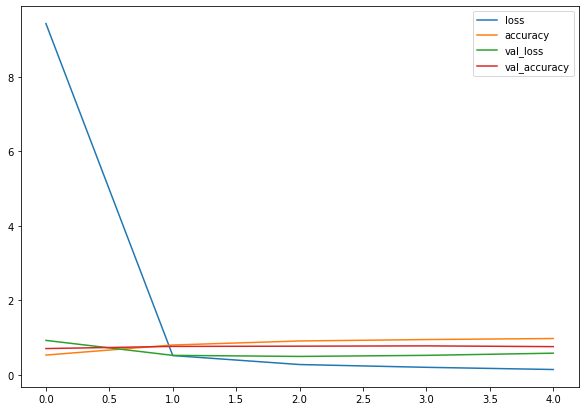

In [ ]:
# Let's plot the history of our model_5
import pandas as pd

pd.DataFrame(history_5.history).plot(figsize=(10, 7))

In [ ]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
  """Returns separates loss curves for training and validation metrics.

  history: history of the model
  """

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss'])) # How manay epochs did we run for?

  # Plot loss
  plt.plot(epochs, loss, label='Training Loss')
  plt.plot(epochs, val_loss, label='Val Loss')
  plt.title('Loss')
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='Training Accuracy')
  plt.plot(epochs, val_accuracy, label='Val Accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

> **Note:** When a model's **validation loss starts to increase**, it's likely the model is **overfitting** on the training dataset. This means, it's learning the patterns in the training dataset too well and thus the models ability to generalize to unseen data diminished.

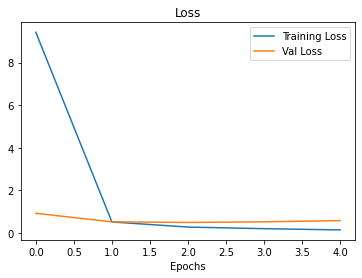

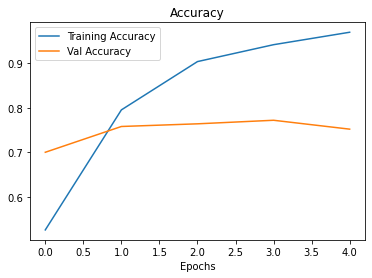

In [ ]:
# Check out the loss and accuracy of the model_5
plot_loss_curves(history_5)

### 6. Adjust the model parameters

Fitting a machine learning models comes in 3 steps:
0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce Overfitting

Ways to induce overfitting:
* Increase the number of Conv Layers
* Increase the number of Conv Filters
* Add another dense layer to the output of our flattened layer

Reduce Overfitting:
* Add data agumentation
* Add regularization layer (such as MaxPool2D)
* Add more data...

> **Note:** Reducing overfitting is also known as **Regularization**.

In [ ]:
# Create the model (this is going to be our new baseline)

model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           input_shape=(224, 224, 3),
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           padding='valid',
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [ ]:
# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
# Fit the model
history_6 = model_6.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 14s 275ms/step - loss: 0.6374 - accuracy: 0.6453 - val_loss: 0.4242 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 10s 205ms/step - loss: 0.4338 - accuracy: 0.8087 - val_loss: 0.4032 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 10s 204ms/step - loss: 0.3899 - accuracy: 0.8380 - val_loss: 0.3544 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 9s 185ms/step - loss: 0.3446 - accuracy: 0.8580 - val_loss: 0.3424 - val_accuracy: 0.8480
Epoch 5/5
47/47 [==============================] - 13s 286ms/step - loss: 0.3026 - accuracy: 0.8933 - val_loss: 0.3330 - val_accuracy: 0.8560


In [ ]:
# Get the summary
model_6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [ ]:
# Summary of model_5
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 213, 213, 10)      10010     
                                                                 
 conv2d_2 (Conv2D)           (None, 204, 204, 10)      10010     
                                                                 
 flatten (Flatten)           (None, 416160)            0         
                                                                 
 dense (Dense)               (None, 1)                 416161    
                                                                 
Total params: 436,461
Trainable params: 436,461
Non-trainable params: 0
_________________________________________________________________


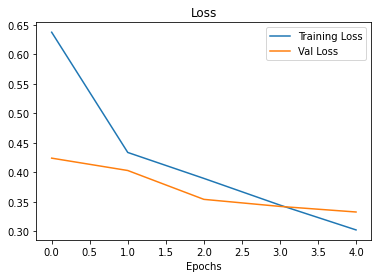

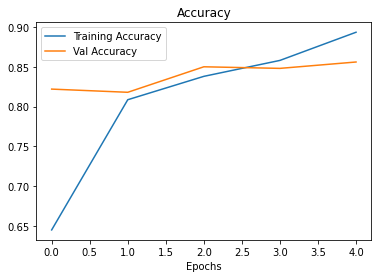

In [ ]:
# Let's plot the loss and accuracy of the model_6
plot_loss_curves(history_6)

### Opening our bags of tricks and finding data agumentation



In [ ]:
# Create ImageDataGenerator training instance with data agumentation
train_datagen_agumented = ImageDataGenerator(rescale=1/255.0,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator training without data agumentation
train_datagen = ImageDataGenerator(rescale=1/255.0)

# Create ImageDataGenerator for test set without data agumentation
test_datagen = ImageDataGenerator(rescale=1/255.0)

**Question:** What is data agumentation?

Data Agumentation is the process of altering our training data, leading it to have more diversity and it turn allowing more generalizable (hopefully).
Altering might mean adjusting the rotation of an image, flipping it, croping it or something similar.

Let's write some code to visualize data agumentation...

In [ ]:
# Import data and agument it from training directory
print("Agumented Train data:")
train_data_agumented = train_datagen_agumented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

# Create non-agumented train data batches
print('Non-Agumented train data:')
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

# Create non-agumented test data batches
print('Non-agumented test data:')
test_data = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

Agumented Train data:
Found 1500 images belonging to 2 classes.
Non-Agumented train data:
Found 1500 images belonging to 2 classes.
Non-agumented test data:
Found 500 images belonging to 2 classes.


**Note:** Data agumentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data agumentation parameters our images are left as they are in the directories but are modified as they are loaded into the model.


Finally... Let's visualize some agumented data.

In [ ]:
# Get some sample batches
images, labels = train_data.next()
agumented_images, agumented_labels = train_data_agumented.next()  # Note: labels are not agumented... only images are agumented

Showing image number: 16


(-0.5, 223.5, 223.5, -0.5)

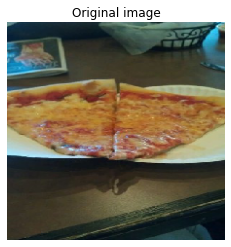

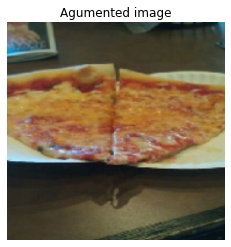

In [ ]:
# Show original images and agumented images
import random
random_number = random.randint(0, 32) # our batchs size is 32
print(f'Showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title('Original image')
plt.axis(False)
plt.figure()
plt.imshow(agumented_images[random_number])
plt.title('Agumented image')
plt.axis(False)

Now we've seen what agumented training data looks like, let's build a model and see how it learns.

In [ ]:
# Create a model (same as model_6)
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           activation='relu',
                           input_shape=(224, 224, 3),
                           padding='valid'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           activation='relu',
                           padding='valid'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1,
                          activation='sigmoid')
])

In [ ]:
# Compile the model
model_7.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
history_7 = model_7.fit(train_data_agumented,  # fitting the model on agumented data
                        epochs=5,
                        steps_per_epoch=len(train_data_agumented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 536ms/step - loss: 0.4442 - accuracy: 0.4080 - val_loss: 0.1716 - val_accuracy: 0.6200
Epoch 2/5
47/47 [==============================] - 24s 505ms/step - loss: 0.1716 - accuracy: 0.5707 - val_loss: 0.1699 - val_accuracy: 0.6920
Epoch 3/5
47/47 [==============================] - 25s 524ms/step - loss: 0.1713 - accuracy: 0.6247 - val_loss: 0.1641 - val_accuracy: 0.7060
Epoch 4/5
47/47 [==============================] - 23s 497ms/step - loss: 0.1712 - accuracy: 0.6160 - val_loss: 0.1695 - val_accuracy: 0.6440
Epoch 5/5
47/47 [==============================] - 24s 521ms/step - loss: 0.1721 - accuracy: 0.5913 - val_loss: 0.1703 - val_accuracy: 0.6600


In [ ]:
model_7.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 29160)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                

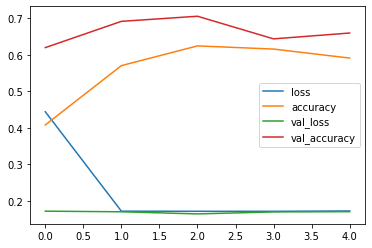

In [ ]:
pd.DataFrame(history_7.history).plot()

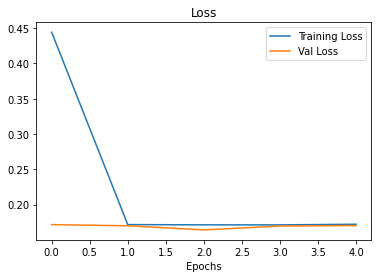

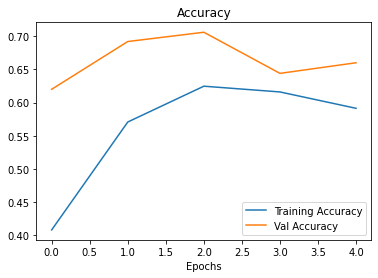

In [ ]:
plot_loss_curves(history_7)

In [ ]:
# Import data and agument it from training directory, shuffle=True
print("Agumented Train data:")
train_data_agumented_shuffled = train_datagen_agumented.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True)

# Create non-agumented train data batches, shuffle=True
print('Non-Agumented train data:')
train_data_shuffled = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True)

# Create non-agumented test data batches, shuffle=True
print('Non-agumented test data:')
test_data_shuffled = test_datagen.flow_from_directory(test_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=True)

Agumented Train data:
Found 1500 images belonging to 2 classes.
Non-Agumented train data:
Found 1500 images belonging to 2 classes.
Non-agumented test data:
Found 500 images belonging to 2 classes.


In [ ]:
# Create a model (same as model_7)
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           activation='relu',
                           input_shape=(224, 224, 3),
                           padding='valid'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           activation='relu',
                           padding='valid'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1,
                          activation='sigmoid')
])

# Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_8 = model_8.fit(train_data_agumented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_agumented_shuffled),
                        validation_data=test_data_shuffled,
                        validation_steps=len(test_data_shuffled))

Epoch 1/5
47/47 [==============================] - 24s 505ms/step - loss: 0.6905 - accuracy: 0.6187 - val_loss: 0.5224 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 23s 490ms/step - loss: 0.5554 - accuracy: 0.7280 - val_loss: 0.4265 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 25s 540ms/step - loss: 0.5148 - accuracy: 0.7667 - val_loss: 0.4161 - val_accuracy: 0.8240
Epoch 4/5
47/47 [==============================] - 23s 481ms/step - loss: 0.4967 - accuracy: 0.7687 - val_loss: 0.3653 - val_accuracy: 0.8600
Epoch 5/5
47/47 [==============================] - 23s 489ms/step - loss: 0.5090 - accuracy: 0.7527 - val_loss: 0.3901 - val_accuracy: 0.8240


In [ ]:
pd.DataFrame(history_8.history)

,loss,accuracy,val_loss,val_accuracy
0,0.690494,0.618667,0.522370,0.798
1,0.555429,0.728000,0.426489,0.838
2,0.514833,0.766667,0.416111,0.824
3,0.496700,0.768667,0.365314,0.860
4,0.509037,0.752667,0.390057,0.824


In [ ]:
model_8.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 29160)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                

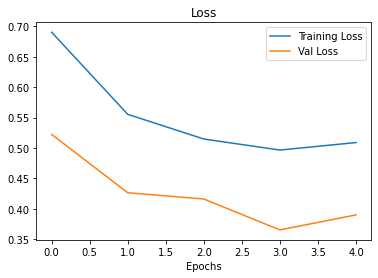

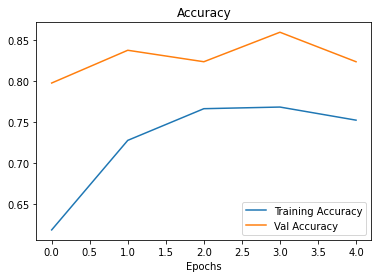

In [ ]:
plot_loss_curves(history_8)

**Note:** When shuffling training data, the model get exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### Repeat until satisfied

Since we've already beaten our baseline, there are few thing we can try to continue improving our model:
* Increase the number of model layers (e.g. add mored Conv2D and MaxPool2D layers)
* Increase the number of filters in each Convolutional layer (e.g. fron 10 to 32, or even 64)
* Train for longer (larger epochs)
* Find the ideal learning rate
* Get more data (give the model more opportunites to learn)
* User **Transfer Learning** to leaverage what another image model has learned and adjust it for our own use case.

> **Practice:** Recreate the model on CNN explainer website (same as model_1) and see how it performed on the agumented data.

In [ ]:
from matplotlib.cbook import open_file_cm
# Let's create a the model same as model_1

model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           activation='relu',
                           input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           strides=1,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_9 = model_9.fit(train_data_agumented_shuffled,
                        epochs=50,
                        steps_per_epoch=len(train_data_agumented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/50
47/47 [==============================] - 25s 521ms/step - loss: 0.6352 - accuracy: 0.6293 - val_loss: 0.4667 - val_accuracy: 0.7780
Epoch 2/50
47/47 [==============================] - 24s 513ms/step - loss: 0.5571 - accuracy: 0.7287 - val_loss: 0.4149 - val_accuracy: 0.8200
Epoch 3/50
47/47 [==============================] - 26s 555ms/step - loss: 0.5126 - accuracy: 0.7587 - val_loss: 0.3657 - val_accuracy: 0.8380
Epoch 4/50
47/47 [==============================] - 24s 510ms/step - loss: 0.4957 - accuracy: 0.7687 - val_loss: 0.3930 - val_accuracy: 0.8360
Epoch 5/50
47/47 [==============================] - 24s 506ms/step - loss: 0.4864 - accuracy: 0.7740 - val_loss: 0.3824 - val_accuracy: 0.8380
Epoch 6/50
47/47 [==============================] - 24s 502ms/step - loss: 0.4649 - accuracy: 0.7887 - val_loss: 0.3515 - val_accuracy: 0.8660
Epoch 7/50
47/47 [==============================] - 24s 496ms/step - loss: 0.4451 - accuracy: 0.8067 - val_loss: 0.3627 - val_accuracy: 0.8480

In [ ]:
model_9.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_10 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_12 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

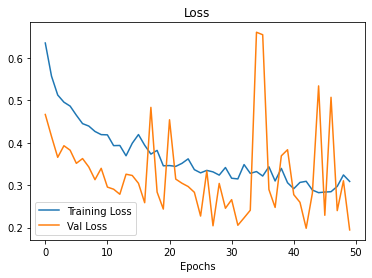

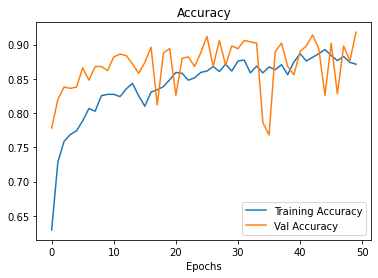

In [ ]:
plot_loss_curves(history_9)

## Making a prediction on our trained CNN model

In [ ]:
# Let's check the class name
print(class_names)

['pizza' 'steak']


--2023-02-06 14:24:42--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2023-02-06 14:24:43 (87.7 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

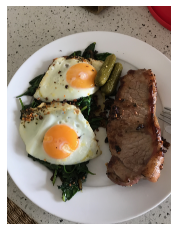

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [ ]:
steak.shape

(4032, 3024, 3)

>**Note:** When you train a neural network, and you want to make prediction with it on your custom data, it's important that you custom data (or new data) is preprcessed into the same format as the data your model was trained.

In [ ]:
# Create a function to import an image and resize it to the be used in our model
def load_and_prep_image(filename, img_shape=224):
  """Read and image from a filename, turns it into tensor and reshape it to
  (img_shape, img_shape, color_channel).

  filename: name of the file to be preprcessed
  img_shape: shape of the image, default=224
  """

  # Read the image
  img = tf.io.read_file(filename)
  # Decode the read file into tensors
  img = tf.image.decode_image(img)
  # Resize the image
  img = tf.image.resize(img, (img_shape, img_shape))
  # Recale the image (get all values in between 0 and 1)
  img = img/255.0

  return img

In [ ]:
# Load in the image and preprocess it
steak = load_and_prep_image(filename='03-steak.jpeg', img_shape=224)
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [ ]:
pred = model_9.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 25ms/step


array([[0.9717121]], dtype=float32)

Looks like our custom image is being put through our model, however it outputs currently a prediction probability.
Now let's visualize the image as well as model's prediction.

In [ ]:
# Remind ourself of the class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We can index the predicted class by rounding the prediction probability and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  """Import an image located at the filename, makes a prediction with the model,
  and plot the image with the predicted class as the title.

  model: model's instance on which you want to make prediction
  filename: name of the image file
  class_names: list of class names of the images
  """
  # Import the target image and preprocess it.
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and the predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class.title()}\nPrediction Probability: {pred}\n")
  plt.axis(False)

1/1 [==============================] - 0s 16ms/step


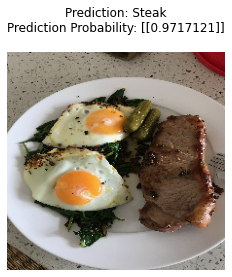

In [ ]:
# Test our image on custom images
pred_and_plot(model=model_9, filename='03-steak.jpeg', class_names=class_names)

Our model works! Let's try it on another image... this time pizza.

--2023-02-06 15:31:00--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.5’

03-pizza-dad.jpeg.5 100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2023-02-06 15:31:00 (54.0 MB/s) - ‘03-pizza-dad.jpeg.5’ saved [2874848/2874848]

1/1 [==============================] - 0s 17ms/step


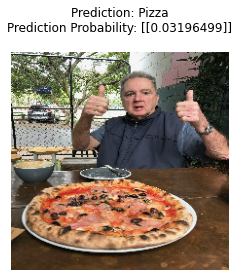

In [ ]:
# Download the image of Pizza from the github
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
# pizza = mpimg.imread("03-pizza-dad.jpeg")
pred_and_plot(model=model_9, filename='03-pizza-dad.jpeg')

# Multi-Class Image Classification

We've just been through a bunch of following steps with a binary classifcation problem (pizza or steak) now we are going to step things up a notch with 10 classes of food (multi-class classification):

1. Become one with the data
2. Preprocess the data (get it ready for the model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat the baseline/reduce overfitting)
7. Repeat until satisfied.

### Import and Become one with the dataset

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-07 15:05:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.145.128, 108.177.127.128, 2a00:1450:4013:c14::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.145.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.2’

10_food_classes_all 100%[===================>] 495.13M  37.3MB/s    in 14s     

2023-02-07 15:05:40 (36.1 MB/s) - ‘10_food_classes_all_data.zip.2’ saved [519183241/519183241]



In [ ]:
import os

# Walk through 10 classes of food data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} in the '{dirpath}'.")

There are 2 directories and 0 in the '10_food_classes_all_data'.
There are 10 directories and 0 in the '10_food_classes_all_data/train'.
There are 0 directories and 750 in the '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 in the '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 in the '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 in the '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 in the '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 in the '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 in the '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 in the '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 in the '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 in the '10_food_classes_all_data/train/ice_cream'.
There are 10 directories and 0 in t

In [ ]:
# Let's setup the train and test directories path
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# Let's get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


File Name: ['3020376.jpg']
Image Shape: (512, 512, 3)


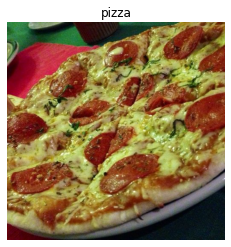

In [ ]:
# Visualize, visualize, visualize
import random

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### Preprocess the data (prepare it for the model)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.0)
test_datagen = ImageDataGenerator(rescale=1/255.0)

In [ ]:
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               batch_size=32,
                                               shuffle=True)
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="categorical",
                                             shuffle=True,
                                             batch_size=32)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### Create a model (start with the baseline)

Replicating the same model as CNN explainer.

In [ ]:
import tensorflow as tf
# Create the model
model_10 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224, 224, 3),
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Compile the model
model_10.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])




### Fit the model

In [ ]:
# Fit the model
history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

### Evaluate the model

In [ ]:
# Evaluate the model on the test data
model_10.evaluate(test_data)

79/79 [==============================] - 14s 173ms/step - loss: 2.8052 - accuracy: 0.3132


[2.805175304412842, 0.3131999969482422]

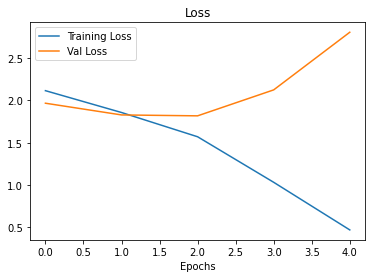

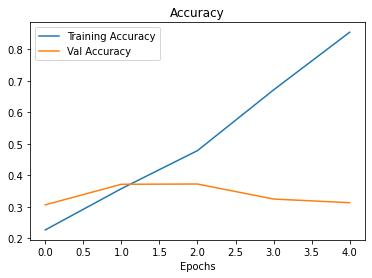

In [ ]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_10)

What does these curves tells us?

Well... it seems our model is **overfitting** the training set badly... In other words, it's geeting great result on the training data but fail to generalize well on unseen data and perform poorly on the test data.

### Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However it's not generalizing well on the unseen data (overfitting).

Sor let's try and fix the overfitting by...
* **Get More Data:** having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model:** if our current model is overfitting on the data, it may be too complicated
One way to simplify a model is by:
  * Reducing the number of layers
  * Reducing the number of hidden units
* **Use Data Augumentation:**  data augumentation manipulates the training data in such a way to add more diversity to it (without altering the original data).
* **User Transfer Learning:** transfer learning leverages the pattern another model has learned on similar data to you own and allows you to use those patterns on your own dataset.

In [ ]:
import tensorflow as tf
# Create the model
model_11 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224, 224, 3),
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Compile the model
model_11.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_11 = model_11.fit(train_data,
                          epochs=15,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/15
235/235 [==============================] - 65s 275ms/step - loss: 2.1825 - accuracy: 0.1907 - val_loss: 2.0811 - val_accuracy: 0.2556
Epoch 2/15
235/235 [==============================] - 62s 265ms/step - loss: 1.9869 - accuracy: 0.2979 - val_loss: 1.9533 - val_accuracy: 0.3048
Epoch 3/15
235/235 [==============================] - 64s 273ms/step - loss: 1.8827 - accuracy: 0.3367 - val_loss: 1.8678 - val_accuracy: 0.3384
Epoch 4/15
235/235 [==============================] - 59s 251ms/step - loss: 1.7723 - accuracy: 0.3812 - val_loss: 1.8244 - val_accuracy: 0.3572
Epoch 5/15
235/235 [==============================] - 64s 271ms/step - loss: 1.6284 - accuracy: 0.4471 - val_loss: 1.8103 - val_accuracy: 0.3740
Epoch 6/15
235/235 [==============================] - 60s 255ms/step - loss: 1.4516 - accuracy: 0.5104 - val_loss: 1.9264 - val_accuracy: 0.3464
Epoch 7/15
235/235 [==============================] - 63s 267ms/step - loss: 1.2192 - accuracy: 0.5916 - val_loss: 2.0840 - val_ac

In [ ]:
import tensorflow as tf
# Create the model
model_12 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224, 224, 3),
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Compile the model
model_12.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_12 = model_12.fit(train_data,
                          epochs=15,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/15
235/235 [==============================] - 48s 201ms/step - loss: 2.0932 - accuracy: 0.2501 - val_loss: 1.9604 - val_accuracy: 0.3044
Epoch 2/15
235/235 [==============================] - 47s 200ms/step - loss: 1.7621 - accuracy: 0.4019 - val_loss: 1.8906 - val_accuracy: 0.3532
Epoch 3/15
235/235 [==============================] - 47s 200ms/step - loss: 1.2999 - accuracy: 0.5757 - val_loss: 1.9461 - val_accuracy: 0.3436
Epoch 4/15
235/235 [==============================] - 47s 202ms/step - loss: 0.7700 - accuracy: 0.7735 - val_loss: 2.2876 - val_accuracy: 0.3164
Epoch 5/15
235/235 [==============================] - 47s 199ms/step - loss: 0.4011 - accuracy: 0.8927 - val_loss: 2.7934 - val_accuracy: 0.2968
Epoch 6/15
235/235 [==============================] - 46s 198ms/step - loss: 0.1787 - accuracy: 0.9617 - val_loss: 3.3631 - val_accuracy: 0.3020
Epoch 7/15
235/235 [==============================] - 46s 197ms/step - loss: 0.0741 - accuracy: 0.9903 - val_loss: 3.8285 - val_ac

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued.

How about trying data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try to improve our model's results by using augmented training data...

Ideally we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [ ]:
# Create augumented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.0,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
# Create the model
model_13 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           input_shape=(224, 224, 3),
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

# Compile the model
model_13.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model
history_13 = model_13.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 139s 587ms/step - loss: 2.1716 - accuracy: 0.2140 - val_loss: 1.9597 - val_accuracy: 0.3128
Epoch 2/5
235/235 [==============================] - 177s 752ms/step - loss: 2.0477 - accuracy: 0.2753 - val_loss: 1.9359 - val_accuracy: 0.3144
Epoch 3/5
235/235 [==============================] - 130s 553ms/step - loss: 2.0074 - accuracy: 0.2999 - val_loss: 1.9407 - val_accuracy: 0.2984
Epoch 4/5
235/235 [==============================] - 118s 501ms/step - loss: 1.9788 - accuracy: 0.3024 - val_loss: 1.8142 - val_accuracy: 0.3760
Epoch 5/5
235/235 [==============================] - 117s 500ms/step - loss: 1.9554 - accuracy: 0.3205 - val_loss: 1.8713 - val_accuracy: 0.3572


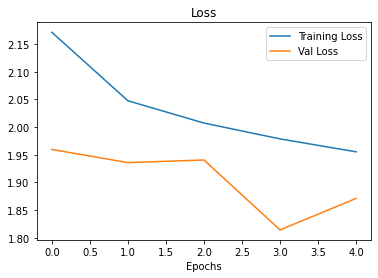

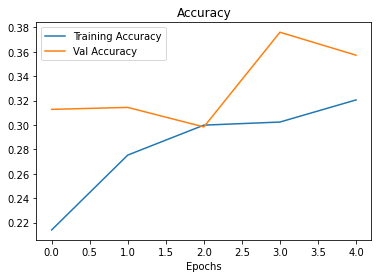

In [ ]:
# plot the loss curves
plot_loss_curves(history_13)

That's look much better, the loss curves are much closer to each other than the baseline model and they look like they are heading in the right direction (certainly not the wrong direction) so if we were to train for longer, we might see further improvements.

In [ ]:
# Let's clone the model 12
model_14 = tf.keras.models.clone_model(model_12)

# Compile the model using the same setup
model_14.compile(loss="categorical_crossentropy",
                 optimizer='adam',
                 metrics='accuracy')

# Fit the model
history_14 = model_14.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

### Repeat Until satisfied.

We could keep going... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/hidden units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameter in our ImageDataGenerator instance)
- try training for longer (e.g. 10 epochs instead of 5)
- try transfer learning

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images.

In [ ]:
# Remind ourself of the class names
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

--2023-02-07 17:32:54--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.02s   

2023-02-07 17:32:54 (84.8 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

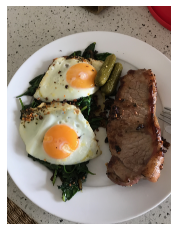

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)
plt.axis(False)

In [ ]:
# Reconfig the pred_and_plot method to work with multi-class classification

def pred_and_plot(model, filename, class_names=class_names):
  """Import an image located at the filename, makes a prediction with the model,
  and plot the image with the predicted class as the title.

  model: model's instance on which you want to make prediction
  filename: name of the image file
  class_names: list of class names of the images
  """
  # Import the target image and preprocess it.
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Add in logic for multi-class and get pred class names
  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  # Plot the image and the predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class.title()}\nPrediction Probability: {[tf.math.reduce_max(pred)]}\n")
  plt.axis(False)

1/1 [==============================] - 0s 21ms/step


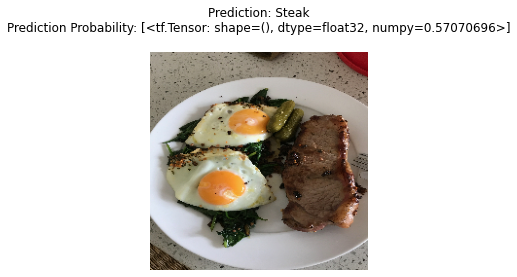

In [ ]:
pred_and_plot(model_13,
              filename='03-steak.jpeg',
              class_names=class_names)

Look like our model didn't perform very well on our custom images this is because it only achieved ~39% accuracy on the test data.
So we can expect it to function quite poorly on other unseen data.

## Saving an loading our model

In [ ]:
# Save a model
model_13.save("saved_trained_model_13")

In [ ]:
# Load in a trained model and evaluate it
loaded_model_13 = tf.keras.models.load_model('saved_trained_model_13')
loaded_model_13.evaluate(test_data)

79/79 [==============================] - 17s 218ms/step - loss: 1.8713 - accuracy: 0.3572


[1.8712669610977173, 0.3571999967098236]

In [ ]:
# Compare our loaded model to our existing model
model_13.evaluate(test_data)

79/79 [==============================] - 13s 165ms/step - loss: 1.8713 - accuracy: 0.3572


[1.8712674379348755, 0.3571999967098236]